In [9]:
import sys
import os
sys.path.append('./MG5')
import madgraph
import numpy as np
import matplotlib.pyplot as plt
import scipy
import Computation_Functions as cmfp

In [10]:
effFileDict = {
            # (1000,275) : "./Script_mH1000_mS275/Events/run_01/tag_1_pythia8_events.hepmc.gz",
            (1000,275) : "./test.txt",
            # (1000,475) : "./Script_mH1000_mS475/Events/run_01/tag_1_pythia8_events.hepmc.gz",
            # (1000,275) : "./Plots_High/Efficiencies_Text_1000_275.txt",
            }


fileHEPDict = {(1000,275) : "./ATLAS_data/HEPData-ins2043503-v3-Figure_2e_of_Aux._Mat._1000_275.root",
                # (1000,475) : "./ATLAS_data/HEPData-ins2043503-v3-Figure_2e_of_Aux._Mat._1000_475.root",
                } #HEP data files

branchHEPDict = {(1000,275) : "Figure 2e of Aux. Mat. 1000_275/Graph1D_y1;1",
                #  (1000,475) : "Figure 2e of Aux. Mat. 1000_475/Graph1D_y1;1",
                } # Efficiencies from HEP data

File_HEP_limit = {(1000,275) : "./ATLAS_data/HEP_Limits/HEPData-ins2043503-v3-Figure_6f_of_Aux._Mat._1000_275.root",
                #  (1000,475) : "./ATLAS_data/HEP_Limits/HEPData-ins2043503-v3-Figure_6e_of_Aux._Mat._1000_475.root",
                }

Branch_HEP_limit_exp = {(1000,275) : "Figure 6f of Aux. Mat./Graph1D_y1;1",
                    # (1000,475) : "Figure 6e of Aux. Mat./Graph1D_y1;1",
                }

Branch_HEP_limit_obs = {(1000,275) : "Figure 6f of Aux. Mat./Graph1D_y2;1",
                    # (1000,475) : "Figure 6e of Aux. Mat./Graph1D_y2;1",
                }


#Constant
c = 3e8# Light velocity in m/s


massPairs = [(1000,275)]
HEP_Lifetime = 95
factor = 1
    

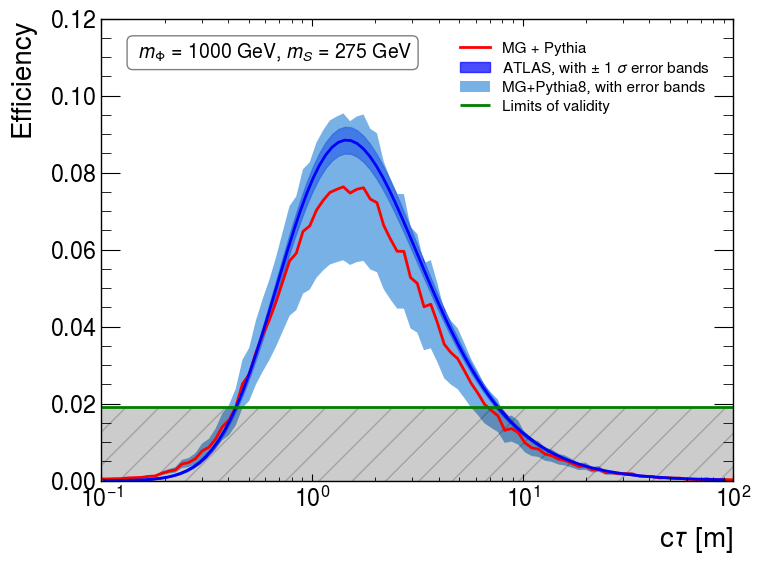

In [11]:
for mPhi,mS in massPairs:

    data_HEP, _ = cmfp.elem_list(fileHEPDict[(mPhi,mS)], branchHEPDict[(mPhi,mS)], File_HEP_limit[(mPhi,mS)], Branch_HEP_limit_exp[(mPhi,mS)]) # Recover public data from ATLAS to compare the 
        
    eff_file = effFileDict[(mPhi,mS)]
    data_recast = np.genfromtxt(eff_file,skip_header=1,delimiter=',',names=True)
    tauN = data_recast['ctaum']
    eff_highETX = data_recast['effhighET']

    fig, ax = plt.subplots()

    ################## Plot efficiency from MG+Pythia8 ##################
    plt.plot(tauN,eff_highETX, 'r', linewidth=2, label = 'MG + Pythia')

    ################## Plot efficiency from HEP data ##################
    plt.plot(data_HEP.values(axis='both')[0],data_HEP.values(axis='both')[1], 'b')

    ################ Uncertainties from HEP ##################
    plt.fill_between(data_HEP.values(axis='both')[0], data_HEP.values(axis='both')[1] +  data_HEP.errors('high')[1] , data_HEP.values(axis='both')[1] - data_HEP.errors('high')[1] , color = 'blue', label = r'ATLAS, with $\pm$ 1 $\sigma$ error bands',alpha=.7)

    ################## Uncertainties from Map ##################
    plt.fill_between(tauN, np.array(eff_highETX) + 0.25* np.array(eff_highETX), np.array(eff_highETX) - 0.25 * np.array(eff_highETX), label='MG+Pythia8, with error bands ', alpha=.7)

    ################## Limits of validity ##################
    ax.hlines(y=(0.25*(max(eff_highETX))), xmin=0, xmax=1e2, linewidth=2, color='g', label = 'Limits of validity' )

    # place a text box in upper left in axes coords
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.05, 0.95, f" $ m_Φ $ = {mPhi} GeV, $m_S$ = {mS} GeV" , transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

    x = np.linspace(0,100)
    ax.fill_between(x, 0.25*(max(eff_highETX)), color='black', alpha=.2, hatch="/", edgecolor="black", linewidth=1.0) # adding hatch
    plt.ylim(0) # start at 0

    plt.xscale('log')
    plt.xlabel(r'c$\tau$ [m]', fontsize=20)
    plt.ylabel('Efficiency', fontsize=20 )
    plt.legend(fontsize = 11, loc=1) # set the legend in the upper right corner
    plt.show()

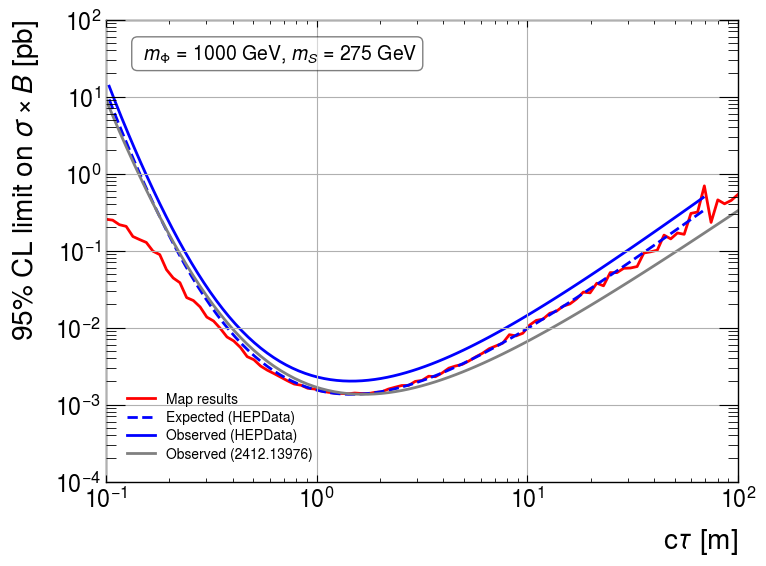

In [14]:
for mPhi,mS in massPairs:

    data_HEP, branch_HEP_limit_exp = cmfp.elem_list(fileHEPDict[(mPhi,mS)], branchHEPDict[(mPhi,mS)], File_HEP_limit[(mPhi,mS)], Branch_HEP_limit_exp[(mPhi,mS)]) # Recover public data from ATLAS to compare the 
    _, branch_HEP_limit_obs = cmfp.elem_list(fileHEPDict[(mPhi,mS)], branchHEPDict[(mPhi,mS)], File_HEP_limit[(mPhi,mS)], Branch_HEP_limit_obs[(mPhi,mS)]) # Recover public data from ATLAS to compare the 
    
    
    eff_file = effFileDict[(mPhi,mS)]
    data_recast = np.genfromtxt(eff_file,skip_header=1,delimiter=',',names=True)
    tauN = data_recast['ctaum']
    eff_highETX = data_recast['effhighET']
    
    
    fig, ax = plt.subplots()

    Nsobs = 0.5630 * 26 * factor # nbr of observed events = 26 ( factor )

    Crr_Sec_obs = (Nsobs)/((np.array(eff_highETX)) * 139e3 ) # Luminosity = 139e3 fb**(-1)

    plt.plot(tauN, Crr_Sec_obs, 'r', label ='Map results', linewidth = 2)

    plt.plot(branch_HEP_limit_exp.values(axis='both')[0], branch_HEP_limit_exp.values(axis='both')[1], 'b', label ='Expected (HEPData)', linewidth = 2, linestyle='dashed')
    plt.plot(branch_HEP_limit_obs.values(axis='both')[0], branch_HEP_limit_obs.values(axis='both')[1], 'b', label ='Observed (HEPData)', linewidth = 2)
    plt.plot(tauN, branch_HEP_limit_exp.values(axis='both')[1], 'gray', label ='Observed (2412.13976)', linewidth = 2, linestyle='solid')
    

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'c$\tau$ [m]')
    plt.ylabel(r'95% CL limit on $\sigma \times B$ [pb]')
    plt.xlim(0.1,100)
    plt.ylim(1e-4,100)

    # place a text box in upper left in axes coords
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.05, 0.95, f" $ m_Φ $ = {mPhi} GeV, $m_S$ = {mS} GeV" , transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

    plt.legend( fontsize = 10, loc=3)
    plt.grid()
    plt.show()
